In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [24]:
c=pd.read_csv('data_job.csv',index_col=0)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
X = c.job_title
y = c.dumsal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [26]:
cvec = CountVectorizer(stop_words=['english','time']).fit(X_train)
df_train = pd.DataFrame(cvec.transform(X_train).todense(),
             columns=cvec.get_feature_names())

In [27]:
df_test = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())
print (df_train.shape)
print (y_train.shape)
print (df_test.shape)
print (y_test.shape)

(651, 126)
(651,)
(321, 126)
(321,)


In [28]:
lr = LogisticRegression()
lr.fit(df_train, y_train)
lr.score(df_test, y_test)
#this is my title score

0.9813084112149533

In [29]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(lr, df_test, y_test, cv=6)
print ("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(lr, df_test, y_test, cv=6)
accuracy = metrics.accuracy_score(y_test, predictions)
print ("Cross-Predicted Accuracy:", accuracy)
#the measure shows the high predictability of the model

Cross-validated scores: [0.92592593 0.92592593 0.98148148 0.96296296 0.96226415 0.94230769]
Cross-Predicted Accuracy: 0.9501557632398754


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
RF = rf.fit(df_train,y_train)
s = cross_val_score(rf, df_train, y_train, n_jobs=-1)
print ("{} Score:\t{:0.3} ± {:0.3}".format("Random Forrest", s.mean().round(3), s.std().round(3)))

Random Forrest Score:	0.983 ± 0.002


In [31]:
rf_features = pd.DataFrame(RF.feature_importances_,
                                   index = df_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
rf_features.head(20)
#the most import keyword is sceintist,analyst,associate,engineer,,python,agile

,importance
scientist,0.088349
analyst,0.078580
associate,0.076165
engineer,0.069471
python,0.067455
agile,0.056153
business,0.055829
research,0.055276
data,0.047393
content,0.041981


Create a few new variables in my dataframe to represent interesting features of a job title. Then I built a new Random Forest with these features.

In [33]:
#the most import keyword is sceintist,analyst,associate,engineer,,python,agile
c['associate'] = list(map(int, c['job_title'].str.lower().str.contains('assoc')))
c['scientist'] = list(map(int, c['job_title'].str.lower().str.contains('scien')))
c['python'] = list(map(int, c['job_title'].str.lower().str.contains('pyth')))
c['engineer'] = list(map(int, c['job_title'].str.lower().str.contains('engi'))) 
c['analyst']=list(map(int, c['job_title'].str.lower().str.contains('analyst'))) 
c['agile']=list(map(int, c['job_title'].str.lower().str.contains('agile'))) 
#making dummies for the words at the top of this cell
c.head()

,state,job_title,company,job_description,avg,dumsal,vis,nlp,scientist,experience,...,sql,manager,machine,java,writing,matlab,associate,analyst,engineer,agile
0,NSW,Pathologist and Research Scientist,Australian Army,Research Scientists are also integral componen...,87500.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,NSW,Business Analyst Process Improvement Professional,Children's Cancer Institute,5+ years’ experience as a Business...,87500.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,NSW,Operations Analyst,chill,You are passionate about the abili...,87500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,NSW,Property Analyst,JLL,Taking the lead in quality managem...,87500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NSW,Technical Marketing Content Writer freelance /...,Daisee,"Daisee employs data scientists, so...",90000.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [53]:
predictors=['associate','scientist','python','engineer','analyst','agile']
#completing a logistic regression model
from sklearn.linear_model import LogisticRegression
X = c[predictors]
y = c.dumsal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
#this is my concatonated score which is quite high

0.8894601542416453

In [54]:
#and a random forest classifier
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X, y, n_jobs=-1)
print ("{} Score:\t{:0.3} ± {:0.3}".format("Random Forrest", s.mean().round(3), s.std().round(3)))

Random Forrest Score:	0.925 ± 0.012


In [55]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(rf, X, y, cv=6)
print ("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(rf, X, y, cv=6)
accuracy = metrics.accuracy_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)
#accuracy of the model is high

Cross-validated scores: [0.90184049 0.93865031 0.94444444 0.9382716  0.93167702 0.89440994]
Cross-Predicted Accuracy: 0.9248971193415638


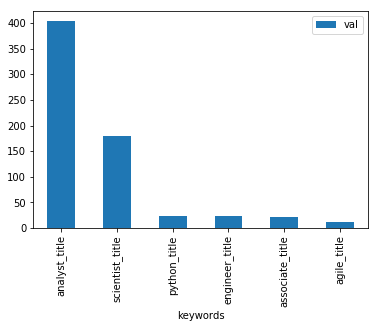

In [56]:

#to illustrates the importance of some keywords compare to others
sum_associate_title=c['associate'].sum()
sum_scientist_title=c['scientist'].sum()
sum_python_title=c['python'].sum()
sum_engineer_title=c['engineer'].sum()
sum_analyst_title=c['analyst'].sum()
sum_agile_title=c['agile'].sum()

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x = [('associate_title',sum_associate_title),
     ('scientist_title', sum_scientist_title),
     ('python_title', sum_python_title),
     ('engineer_title', sum_engineer_title),
     ('analyst_title', sum_analyst_title),
     ('agile_title',sum_agile_title),
    
     #('sum_matlab',sum_matlab)
     ]
pd.DataFrame(x, columns=['keywords','val']).sort_values(by=['val'],ascending=False).set_index('keywords').plot(kind='bar')
#for majority of jobs title analyst,scientist and python have been used more than other keywords.

In [57]:
predictors=['associate','scientist','python','engineer','analyst','agile']

In [58]:
#to see the importance of some job kewords for paid job over the median.
c.loc[c['dumsal']>0].groupby(['state'])[predictors].sum()

,associate,scientist,python,engineer,analyst,agile
state,,,,,,
NSW,12,16,12,0,22,12
QLD,0,9,0,0,8,0
VIC,0,4,0,12,12,0


In [59]:
#to see the importance of some job kewords for paid job over the median in diferent states
c.loc[c['dumsal']==0].groupby(['state'])[predictors].sum()

,associate,scientist,python,engineer,analyst,agile
state,,,,,,
NSW,0,95,12,11,309,0
Nan,0,0,0,0,23,0
QLD,0,19,0,0,28,0
VIC,9,36,0,0,1,0
WA,0,0,0,0,1,0


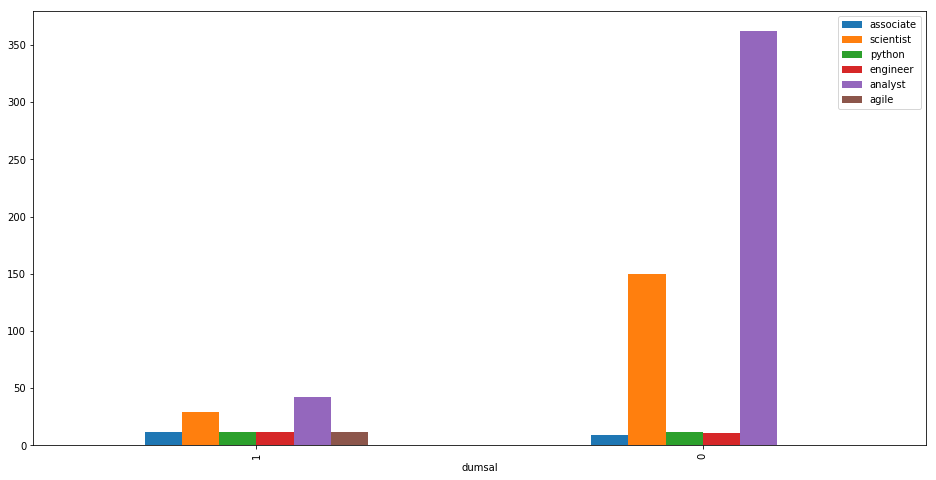

In [60]:
#for both groups analyst and scientists have been used in the job titles
c.groupby(['dumsal'])[predictors].sum().sort_values(by=predictors,ascending=False).plot(kind='bar',figsize=(16,8), fontsize=10)

In [61]:
c.groupby(['dumsal'])['company'].value_counts()

dumsal  company                                   
0               NSW Health Service                    47
                IBM                                   38
                JLL                                   25
                 chill                                24
                AllAssignmentHelp.com                 24
                Australian Army                       24
                Children's Cancer Institute           24
                Kim & Associates                      24
                Microsoft                             24
                The Treasury                          24
                Medius Health                         22
                Avis Budget Group                     19
                CareerHub                             19
                Freelancer.com                        19
                GWF                                   19
                ISS                                   19
                JB Hi-Fi             

In [65]:
#completing a logistic regression model
from sklearn.linear_model import LogisticRegression

X=c[predictors]
y = c.dumsal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
#this is my concatonated score since it's high I'm only going to use  
y_pred = lr.predict(X_test)

In [66]:
df = pd.DataFrame(columns=['y_test','y_predict'])
df.y_test=y_test
df.y_predict=y_pred
print(df[df['y_test']==df['y_predict']].count(),'y_test=',len(y_test))

y_test       427
y_predict    427
dtype: int64 y_test= 486


In [67]:
#and a random forest classifier
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X, y, n_jobs=-1)
print ("{} Score:\t{:0.3} ± {:0.3}".format("Random Forrest", s.mean().round(3), s.std().round(3)))

Random Forrest Score:	0.925 ± 0.012


In [68]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(rf, X, y, cv=6)
print ("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(rf, X, y, cv=6)
accuracy = metrics.accuracy_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)
#accuracy is high

Cross-validated scores: [0.90184049 0.93865031 0.94444444 0.9382716  0.93167702 0.89440994]
Cross-Predicted Accuracy: 0.9248971193415638


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[427   0]
 [ 59   0]]


The result is telling us that we have 427 correct predictions and 59 incorrect predictions.

In [71]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#all the results are promising

             precision    recall  f1-score   support

          0       0.88      1.00      0.94       427
          1       0.00      0.00      0.00        59

avg / total       0.77      0.88      0.82       486



C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
list(zip(clf.feature_importances_,X))
#it seems all features are important and none of them was deleted by L1-seems agile is the most keyword

[(0.1363394145519007, 'associate'),
 (0.10064732466211887, 'scientist'),
 (0.1940855086514699, 'python'),
 (0.12371141275791482, 'engineer'),
 (0.1764877048637023, 'analyst'),
 (0.26872863451289347, 'agile')]

In [74]:
#sending my final to a csv
c.to_csv("data_job_title" , sep=',', encoding='utf-8')